In [1]:
# Import modules
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# helpers
%matplotlib inline

In [2]:
# Import the data set
df = pd.read_csv('credit1.csv')
credit = df

In [3]:
# Show the first five rows
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,2
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,2


In [4]:
# Show the data types, all have been converted to numeric
credit.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

## Scatter Plots 

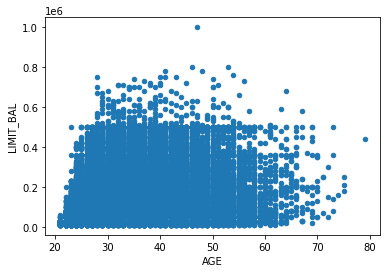

In [5]:
# Scatter plot showing Age on X and LIMIT_BL on Y
# Too many points to be useful
credit.plot.scatter(x='AGE', y='LIMIT_BAL')
print()

In [6]:
# Create a sample size of 200 records
credit_sample=credit.sample(200)

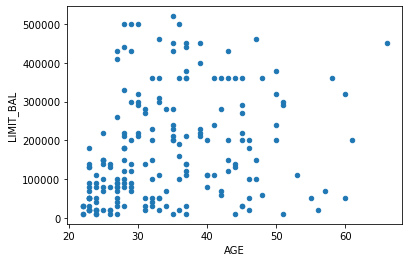

In [7]:
# Plot the AGE on X and LIMIT_BAL on Y
# As expected, the majority of the customers are 40 and under, and the LIMIT_BAL is less
# than $300,000
age_range=pd.cut(credit_sample['AGE'], [20, 30, 40, 50, 60, 70, 80])
credit_sample.plot.scatter(x="AGE", y="LIMIT_BAL")
print()

In [8]:
# Create a sample size of 200 records
credit_sample=credit.sample(100)

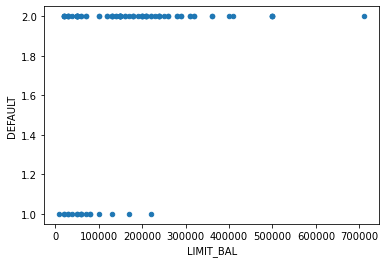

In [9]:
# Scattter plot of 100 customers
# Shows the majority of customers in default (DEFAULT=1) have a LIMIT_BAL less than 200000
# Default=1, not default=2
credit_sample.plot.scatter(x="LIMIT_BAL", y="DEFAULT")
print()

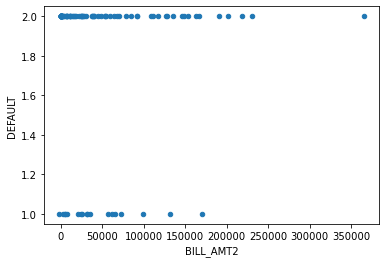

In [10]:
# Scattter plot of 100 customers
# Shows the majority of customers in default (DEFAULT=1) were billed in September (BILL_AMT2)
# less than $50,000
# Default=1, not default=2
credit_sample.plot.scatter(x="BILL_AMT2", y="DEFAULT")
print()

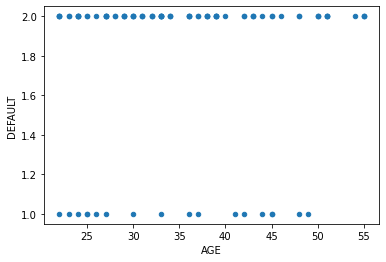

In [11]:
# Scattter plot of 100 customers
# Shows the majority of customers in default (DEFAULT=1) were 30 and under
# less than $50,000
# Default=1, not default=2
age_range=pd.cut(credit_sample['AGE'], [20, 30, 40, 50, 60, 70, 80])
credit_sample.plot.scatter(x="AGE", y="DEFAULT")
print()

## Histograms

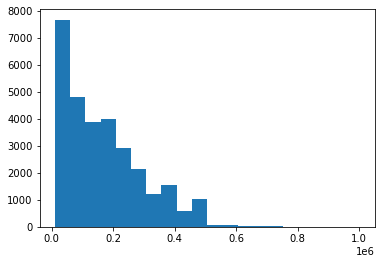

In [12]:
# Histogram of the LIMIT_BAL
# Nearly 8,000 (>25%) of the customers have a LIMIT_BAL less than $50,000
plt.hist(credit['LIMIT_BAL']
         ,bins=20)
plt.show()

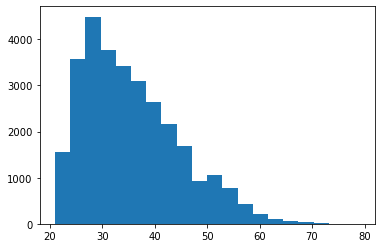

In [13]:
# Histogram showing the age
# ~33% of the customers are 30 and under 
plt.hist(credit['AGE'],
        bins=20)
plt.show()

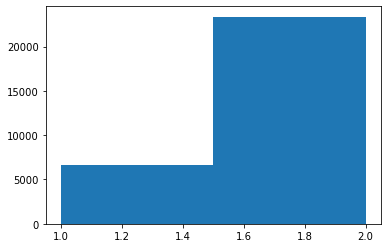

In [14]:
# Histogram of 
# Around 6,500 (>20%) of the customers are in default
plt.hist(credit['DEFAULT'],
        bins=2)
plt.show()

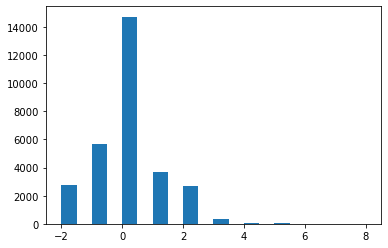

In [15]:
# Histogram of payment status in Sep 05 (PAY_0)
# Over 14,000 used revolving credit in Sep 05
plt.hist(credit['PAY_0'],
        bins=20
        )
plt.show()

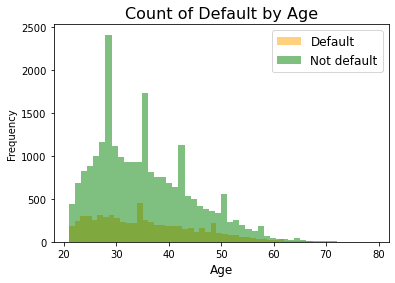

In [16]:
# Histogram of age, showing default status
# Even though there are spikes in the counts for accounts not in default, there is no 
# corresponding count for the same age that is in default
# Indicates that the age spikes do not imply a corresponding spike in defaults

credit[credit['DEFAULT']==1]['AGE'].plot.hist(
    bins=50,alpha=0.5,color='orange', label='Default')
credit[credit['DEFAULT']==2]['AGE'].plot.hist(
    bins=50,alpha=0.5, color='green', label='Not default')
plt.legend(fontsize=12)
plt.title ("Count of Default by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
print()                        

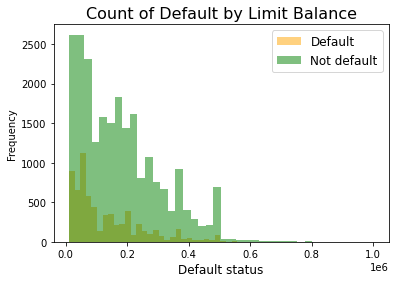

In [17]:
# Histogram of LIMIT_BAL, showing default status
# The slopes are similar between the counts for the accounts in default compared to the 
# accounts not in default

credit[credit['DEFAULT']==1]['LIMIT_BAL'].plot.hist(
    bins=40,alpha=0.5,color='orange', label='Default')
credit[credit['DEFAULT']==2]['LIMIT_BAL'].plot.hist(
    bins=40,alpha=0.5, color='green', label='Not default')
plt.legend(fontsize=12)
plt.title ("Count of Default by Limit Balance", fontsize=16)
plt.xlabel("Default status", fontsize=12)
print()

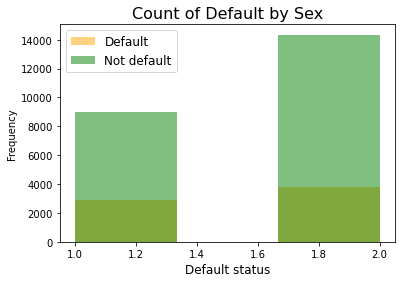

In [18]:
# Histogram comparing default status based on SEX (Male=1, Female=2)
# 9000 males are not in default, and 2900 are in default (24% of males are in default)
# ~14,000 females are not in default, and ~3800 are in default (21% of females are in default)
# There are more female clients than male clients, and male clients are slightly 
# more likely to be in default

credit[credit['DEFAULT']==1]['SEX'].plot.hist(
    bins=3,alpha=0.5,color='orange', label='Default')
credit[credit['DEFAULT']==2]['SEX'].plot.hist(
    bins=3,alpha=0.5, color='green', label='Not default')


plt.legend(fontsize=12)
plt.title ("Count of Default by Sex", fontsize=16)
plt.xlabel("Default status", fontsize=12)
print()

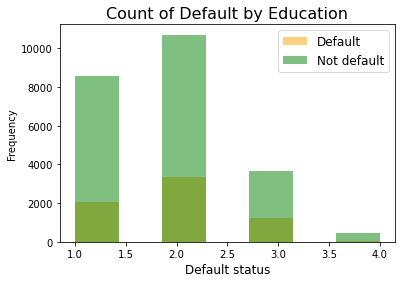

In [19]:
# Histogram comparing default status by education
# Education (1=Graduate School, 2=University, 3=High School, 4=Other)
# Graduate School - Second largest group, 19% in default
# University - Largest group, 24% in default
# High School - Third largest group, 25% in default, most likely to be in default
# Other - Smallest group, 7% in default, least likely to be in default

credit[credit['DEFAULT']==1]['EDUCATION'].plot.hist(
    bins=7,alpha=0.5,color='orange', label='Default')
credit[credit['DEFAULT']==2]['EDUCATION'].plot.hist(
    bins=7,alpha=0.5, color='green', label='Not default')


plt.legend(fontsize=12)
plt.title ("Count of Default by Education", fontsize=16)
plt.xlabel("Default status", fontsize=12)
print()

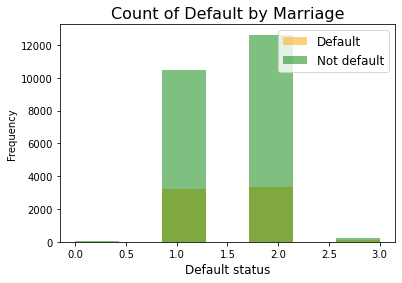

In [20]:
# Histogram comparing default status by marital status
# Marital status (1=Married, 2=Single, 3=Divorce, 0=Other)
# 99% of the customers are either married or single 
# Married - second largest group, 23% are in default
# Single - largest group, 21% are in default
# Divorced - very small group (1% of total), second to the smallest, 26% are in default
# Other - smallest group (.2%), 9% are in default
credit[credit['DEFAULT']==1]['MARRIAGE'].plot.hist(
    bins=7,alpha=0.5,color='orange', label='Default')
credit[credit['DEFAULT']==2]['MARRIAGE'].plot.hist(
    bins=7,alpha=0.5, color='green', label='Not default')

plt.legend(fontsize=12)
plt.title ("Count of Default by Marriage", fontsize=16)
plt.xlabel("Default status", fontsize=12)
print()

## Pivot tables and Pivot charts

In [21]:

# Seaborn table comparing CREDIT_LIM by DEFAULT
# 1 = Default, 2 = Not Default
credit_pivot = pd.pivot_table(credit, columns='DEFAULT', 
                              aggfunc='count',
                              values='ID')
credit_pivot

DEFAULT,1,2
ID,6636,23364


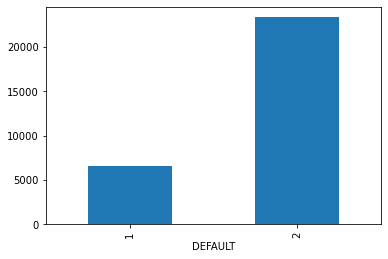

In [22]:
# Count in DEFAULT
credit.groupby('DEFAULT')['ID'].count().plot(kind='bar')
print()

In [23]:
# Seaborn plot comparing DEFAULT by MARRIAGE
# 1 = Default, 2 = Not Default
credit_pivot = pd.pivot_table(credit, columns="MARRIAGE", 
                        index='DEFAULT',
                        aggfunc='count', 
                        values='ID',
                        margins=True)
credit_pivot

MARRIAGE,0,1,2,3,All
DEFAULT,,,,,
1,5,3206,3341,84,6636
2,49,10453,12623,239,23364
All,54,13659,15964,323,30000


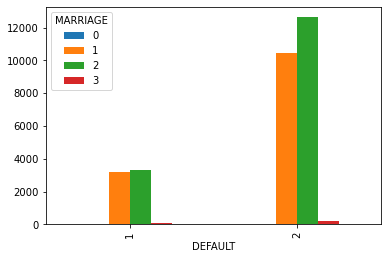

In [24]:
# Seaborn plot comparing CREDIT_LIM by MARRIAGE
# 1 = Default, 2 = Not Default
credit_pivot = pd.pivot_table(credit, columns="MARRIAGE", 
                        index='DEFAULT',
                        aggfunc='count', 
                        values='ID').plot(kind='bar')
print()

In [25]:
# Seaborn table comparing SEX by DEFAULT
# Default: Default=1, Not Default=2
# Sex: Male=1, Female=2
# 2873 Males in default, 3763 Females in default
credit_pivot = pd.pivot_table(credit, columns='SEX', 
                              index='DEFAULT',
                              aggfunc='count',
                              values='ID',
                              margins=True)
credit_pivot

SEX,1,2,All
DEFAULT,,,
1,2873,3763,6636
2,9015,14349,23364
All,11888,18112,30000


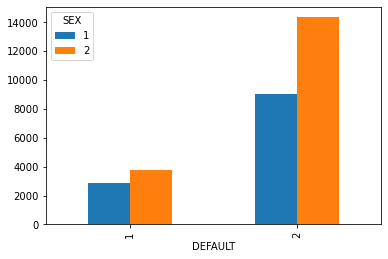

In [26]:
# Seaborn plot comparing SEX by DEFAULT
# 1 = Default, 2 = Not Default

credit_pivot = pd.pivot_table(credit, columns='SEX', 
                              index='DEFAULT', 
                        aggfunc='count'
                              ,values='ID').plot(kind='bar')

In [27]:
# Seaborn plot comparing CREDIT_LIM by DEFAULT
# 1 = Default, 2 = Not Default
# Discretized LIMIT_BAL

# Customers with a limit balance less than 100,000 are most likely to be in default
# 0-100k - 24% in default
# 100-200k - 24% in default
# 200-300k - 19% in default
# 300-400k - 16% in default
# 400-500k - 14% in default
# 500-1000k - 13% in default

limit_range=pd.cut(credit['LIMIT_BAL'], 
                   [0,100000, 200000, 300000, 400000, 500000, 1000000])
credit_pivot = pd.pivot_table(credit, columns='DEFAULT', 
                        index=limit_range,     
                        aggfunc='count', 
                        values='ID')
credit_pivot

DEFAULT,1,2
LIMIT_BAL,,
"(0, 100000]",3684,8814
"(100000, 200000]",1535,6345
"(200000, 300000]",812,4247
"(300000, 400000]",388,2371
"(400000, 500000]",194,1404
"(500000, 1000000]",23,183


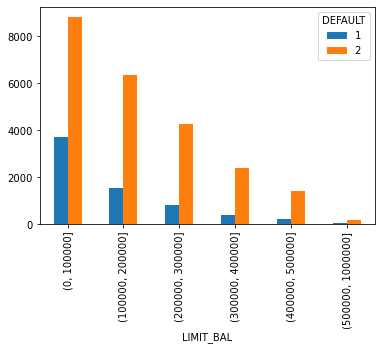

In [28]:
# Seaborn plot comparing LIMIT_BAL by DEFAULT
# 1 = Default, 2 = Not Default
# Discretized LIMIT_BAL
# Customers with a limit balance less than 100,000 are most likely to be in default
# 0-100k - 24% in default
# 100-200k - 24% in default
# 200-300k - 19% in default
# 300-400k - 16% in default
# 400-500k - 14% in default
# 500-1000k - 13% in default

limit_range=pd.cut(credit['LIMIT_BAL'], 
                   [0,100000, 200000, 300000, 400000, 500000, 1000000])
credit_pivot = pd.pivot_table(credit, columns='DEFAULT', 
                        index=limit_range,     
                        aggfunc='count', 
                        values='ID').plot(kind='bar')
print()

In [29]:
# Seaborn plot comparing AGE by DEFAULT
# 1 = Default, 2 = Not Default
# Discretized age
# 20-30 - 8% are in default
# 30-40 - 7% are in default
# 40-50 - 5% are in default
# 50-60 - 2% are in default
# 60-70 - 0.2% are in default
# 70-80 - 0.02% are in default

age_range=pd.cut(credit['AGE'], [20, 30, 40, 50, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns=age_range, 
                        index='DEFAULT',
                        aggfunc='count', 
                        values='ID')
credit_pivot

AGE,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
DEFAULT,,,,,,
1,2471,2189,1399,504,68,5
2,8542,8524,4606,1493,189,10


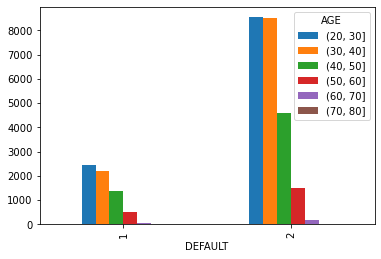

In [30]:
# Seaborn plot comparing AGE by DEFAULT
# 1 = Default, 2 = Not Default
# Discretized age
# 20-30 - 8% of the total customers are in default
# 30-40 - 7% of the total customers are in default
# 40-50 - 5% of the total customers are in default
# 50-60 - 2% of the total customers are in default
# 60-70 - 0.2% of the total customers are in default
# 70-80 - 0.02% of the total customers are in default

age_range=pd.cut(credit['AGE'], [20, 30, 40, 50, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns=age_range, 
                        index='DEFAULT',
                        aggfunc='count', 
                        values='ID').plot(kind='bar')
print()

In [31]:
# Seaborn plot comparing AGE by DEFAULT
# 1 = Default, 2 = Not Default
# Discretized age
# Evaluated by age group
# 20-25 - 27% are in default
# 25-30 - 20% are in default
# 30-35 - 19% are in default
# 35-40 - 22% are in default
# 40-45 - 22% are in default
# 45-50 - 25% are in default
# 50-55 - 25% are in default
# 55-60 - 26% are in default
# 60-70 - 26% are in default
# 70-80 - 033% are in default

age_range=pd.cut(credit['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
table = credit.pivot_table(values='ID', 
                           aggfunc='count',
                           index=[age_range], 
                           columns=['DEFAULT'])
table


DEFAULT,1,2
AGE,,
"(20, 25]",1032,2839
"(25, 30]",1439,5703
"(30, 35]",1126,4670
"(35, 40]",1063,3854
"(40, 45]",798,2807
"(45, 50]",601,1799
"(50, 55]",353,1072
"(55, 60]",151,421
"(60, 70]",68,189


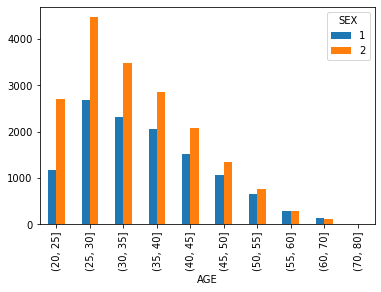

In [32]:
# Seaborn plot comparing CREDIT_LIM by AGE
# 1 = Default, 2 = Not Default
# No real value in looking at CREDIT_LIM by AGE

age_range=pd.cut(credit['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns='SEX', 
                        index=age_range,
                        aggfunc='count', 
                        values='ID').plot(kind='bar')
# print()

In [33]:
# Seaborn plot comparing AGE by SEX
# 1 = Default, 2 = Not Default
age_range=pd.cut(credit['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns='SEX', 
                        index=age_range,
                        aggfunc='count', 
                        values='ID')
credit_pivot

SEX,1,2
AGE,,
"(20, 25]",1165,2706
"(25, 30]",2677,4465
"(30, 35]",2309,3487
"(35, 40]",2054,2863
"(40, 45]",1526,2079
"(45, 50]",1061,1339
"(50, 55]",657,768
"(55, 60]",290,282
"(60, 70]",140,117


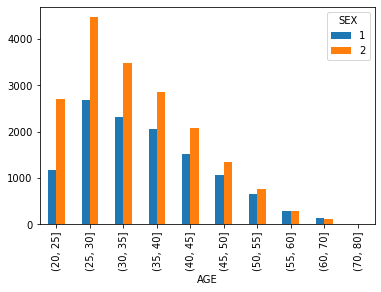

In [34]:
# Seaborn plot comparing AGE by SEX
# 1 = Male, 2 = Female
# Interesting, more female customers than male in nearly every age group
age_range=pd.cut(credit['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns='SEX', 
                        index=age_range,
                        aggfunc='count', 
                        values='ID').plot(kind='bar')

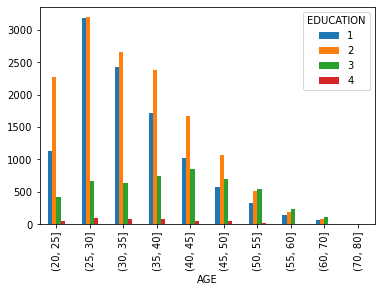

In [35]:
# Seaborn plot comparing AGE by EDUCATION
# 1=Grad School, 2=University, 3=High School, 4=Other
# Not much benefit comparing AGE and EDUCATION
age_range=pd.cut(credit['AGE'], [20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 80])
credit_pivot = pd.pivot_table(credit, columns='EDUCATION', 
                        index=age_range,
                        aggfunc='count', 
                       values='ID').plot(kind='bar')
# print()

In [36]:
# Seaborn table comparing AGE and LIMIT_BAL
# Shows how many people in different age groups received credit by the amount 
# of credit provided
# Not much benefit

age_range=pd.cut(credit['AGE'], [20, 30, 40, 50, 60, 70, 80])
limit_range=pd.cut(credit['LIMIT_BAL'], 
                   [0,100000, 200000, 300000, 400000, 500000, 1000000])
credit_pivot = pd.pivot_table(credit, columns=limit_range, 
                        index=age_range,
                        aggfunc='count', 
                        values='ID')
#                        margins=True)
credit_pivot

LIMIT_BAL,"(0, 100000]","(100000, 200000]","(200000, 300000]","(300000, 400000]","(400000, 500000]","(500000, 1000000]"
AGE,,,,,,
"(20, 30]",5794,2882,1385,673,254,25
"(30, 40]",3255,3039,2276,1274,762,107
"(40, 50]",2381,1455,1072,619,426,52
"(50, 60]",975,435,278,162,130,17
"(60, 70]",90,65,43,30,24,5
"(70, 80]",3,4,5,1,2,0


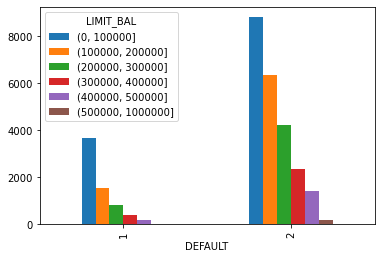

In [37]:
# Seaborn table comparing CREDIT_LIM by DEFAULT
# 1 = Default, 2 = Not Default
# Comnpares how many people were in default or not in default by limit balance
# The ratio of those in default seemed to closely align with those not in default, 
# when viewed LIMIT_BAL

limit_range=pd.cut(credit['LIMIT_BAL'], 
                   [0,100000, 200000, 300000, 400000, 500000, 1000000])
credit_pivot = pd.pivot_table(credit, columns=limit_range, 
                        index='DEFAULT',
                        aggfunc='count', 
                        values='ID').plot(kind='bar')

Text(0.5, 1.0, 'BILL_AMT3 Histogram')

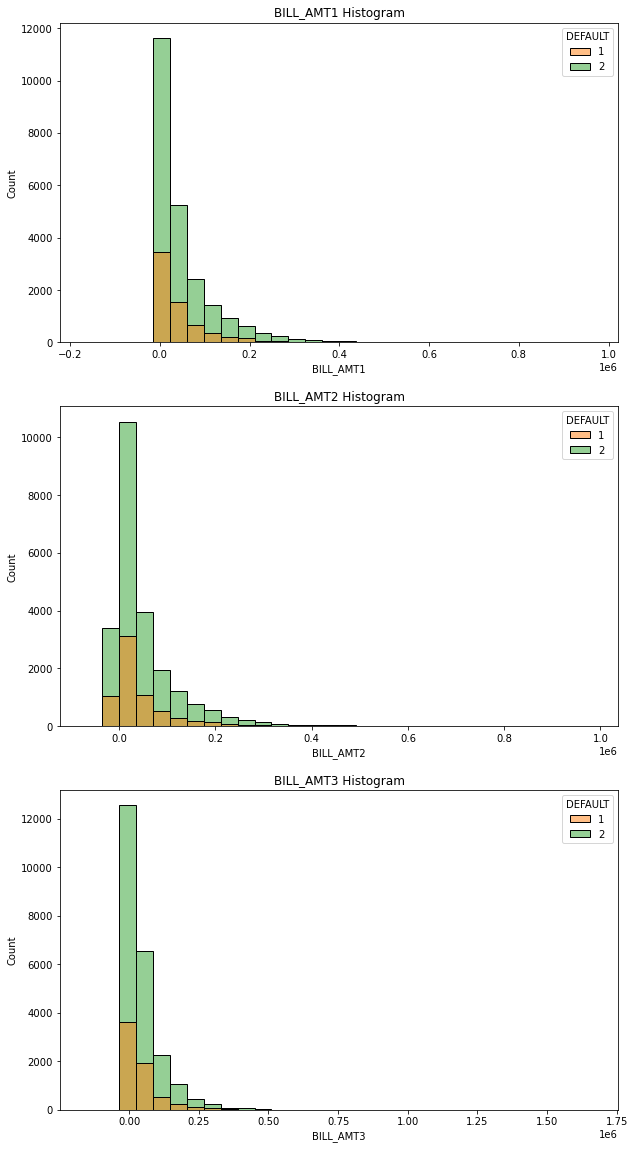

In [38]:
# Prints 3 histograms at a time, using Seaborn
# Investigating BILL_AMTs evaluating how many were in default or not
# Data is heavily skewed to the left on all plots

fig, axes = plt.subplots(3, 1, figsize=(10,20))

sns.histplot(ax=axes[0], data=credit, x="BILL_AMT1", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("BILL_AMT1 Histogram")

sns.histplot(ax=axes[1], data=credit, x="BILL_AMT2", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[1].set_title("BILL_AMT2 Histogram")

sns.histplot(ax=axes[2], data=credit, x="BILL_AMT3", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("BILL_AMT3 Histogram")

Text(0.5, 1.0, 'BILL_AMT6 Histogram')

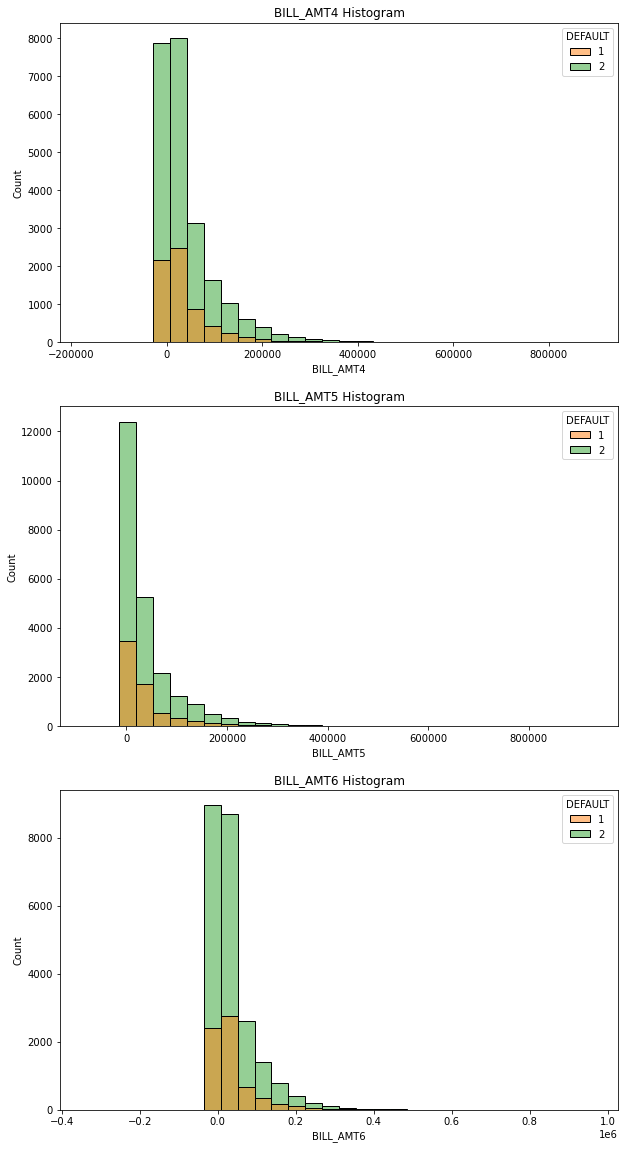

In [39]:
# Prints 3 histograms at a time, using Seaborn
# Investigating BILL_AMTs evaluating how many were in default or not
# Data is heavily skewed to the left on all plots

fig, axes = plt.subplots(3, 1, figsize=(10,20))

sns.histplot(ax=axes[0], data=credit, x="BILL_AMT4", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("BILL_AMT4 Histogram")

sns.histplot(ax=axes[1], data=credit, x="BILL_AMT5", hue='DEFAULT',
            palette=["C1", "C2"], 
            bins=30)
axes[1].set_title("BILL_AMT5 Histogram")

sns.histplot(ax=axes[2], data=credit, x="BILL_AMT6", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("BILL_AMT6 Histogram")

Text(0.5, 1.0, 'PAY_AMT3 Histogram')

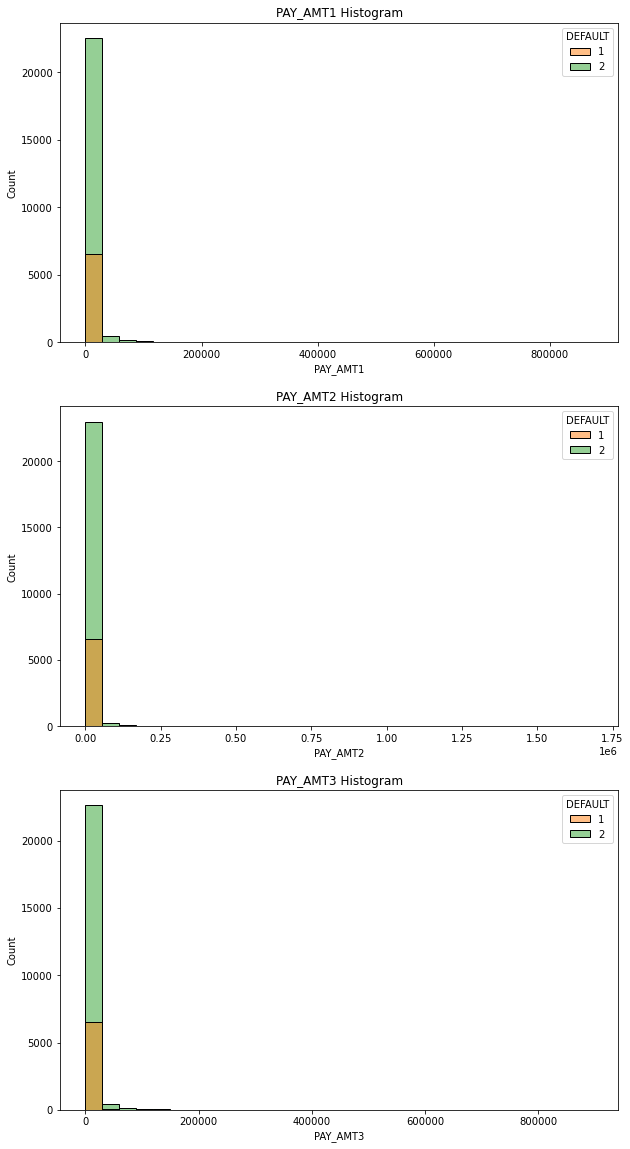

In [40]:
# Prints 3 histograms at a time, using Seaborn
# Investigating PAY_AMTs evaluating how many were in default or not
# Data is heavily skewed to the left on all plots
# Vast mojority of payments were in the smallest payment bin

fig, axes = plt.subplots(3, 1, figsize=(10,20))

sns.histplot(ax=axes[0], data=credit, x="PAY_AMT1", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("PAY_AMT1 Histogram")

sns.histplot(ax=axes[1], data=credit, x="PAY_AMT2", hue='DEFAULT',
            palette=["C1", "C2"],
             bins=30)
axes[1].set_title("PAY_AMT2 Histogram")

sns.histplot(ax=axes[2], data=credit, x="PAY_AMT3", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("PAY_AMT3 Histogram")

Text(0.5, 1.0, 'PAY_AMT6 Histogram')

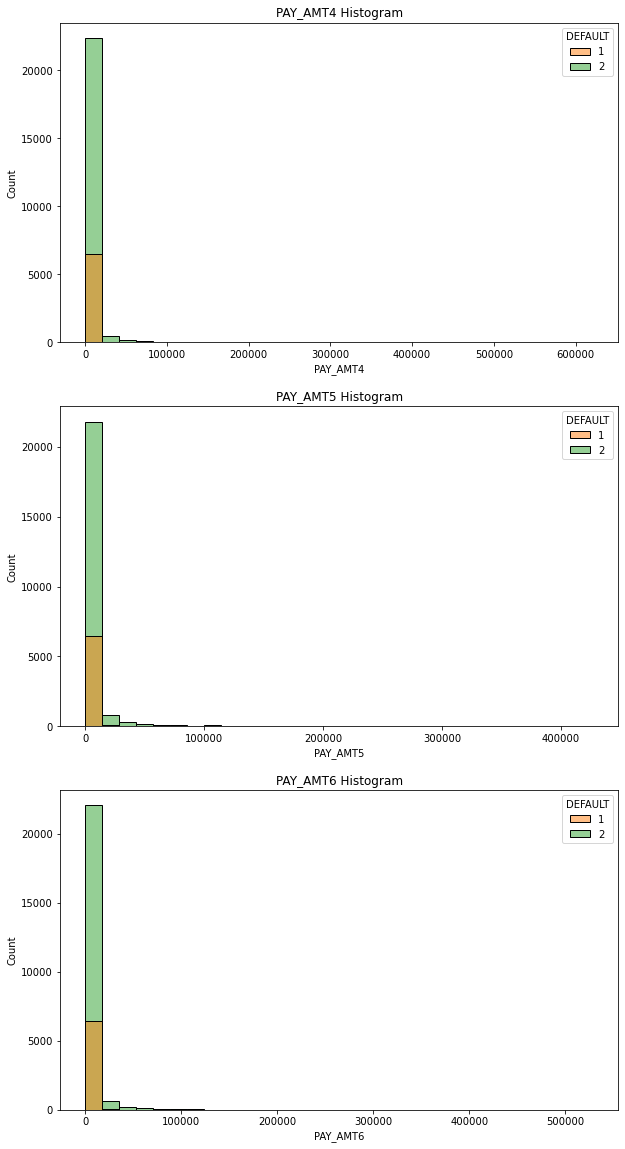

In [41]:
# Prints 3 histograms at a time, using Seaborn
# Investigating PAY_AMTs evaluating how many were in default or not
# Data is heavily skewed to the left on all plots
# Vast mojority of payments were in the smallest payment bin

sns.histplot(ax=axes[0], data=credit, x="PAY_AMT4", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("PAY_AMT4 Histogram")

sns.histplot(ax=axes[1], data=credit, x="PAY_AMT5", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[1].set_title("PAY_AMT5 Histogram")

sns.histplot(ax=axes[2], data=credit, x="PAY_AMT6", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("PAY_AMT6 Histogram")

Text(0.5, 1.0, 'PAY_3 Histogram')

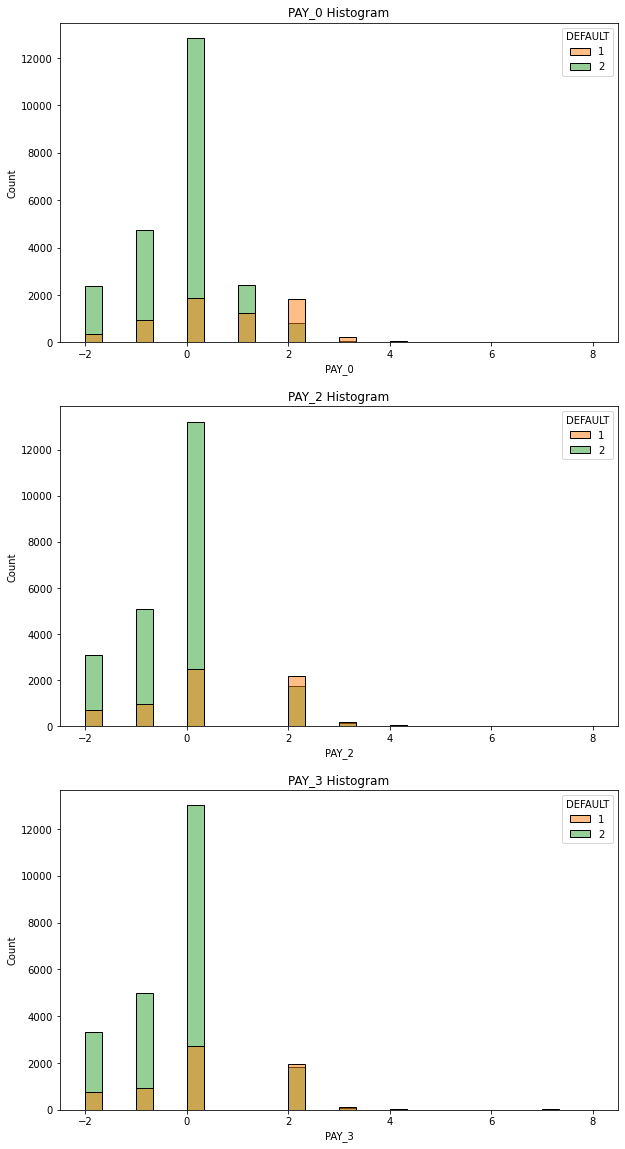

In [55]:
# Prints 3 histograms at a time, using Seaborn
# Investigating PAY status (History of Past Payment and evaluating how many 
# were in default or not.
# Key : -2=No consumption, -1=Paid in full, 0=used revolving credit, 
# 1=payment delay 1 month, 2=payment delay 2 months, 3=payment delay 3 months, ...
# Color change for payment status =2 is where the number in Default (1) exceeds the 
# number not in default (2)
# All 3 histograms, status >= 2, the number in default is greater than not in default

fig, axes = plt.subplots(3, 1, figsize=(10,20))

sns.histplot(ax=axes[0], data=credit, x="PAY_0", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("PAY_0 Histogram")

sns.histplot(ax=axes[1], data=credit, x="PAY_2", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[1].set_title("PAY_2 Histogram")

sns.histplot(ax=axes[2], data=credit, x="PAY_3", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("PAY_3 Histogram")

Text(0.5, 1.0, 'PAY_6 Histogram')

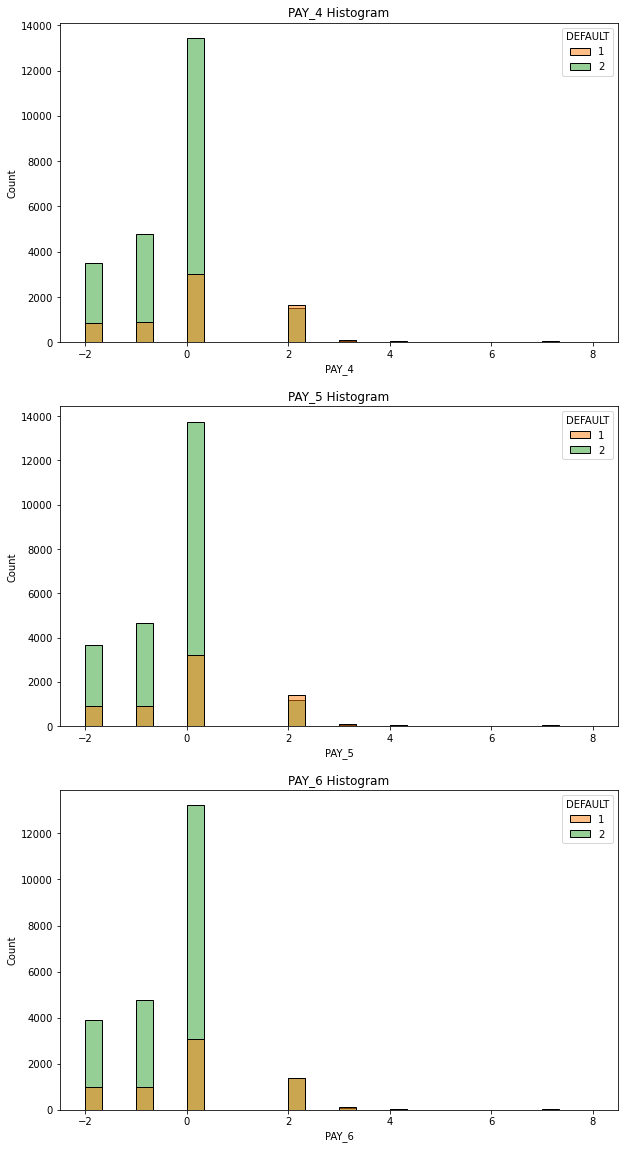

In [56]:
# Prints 3 histograms at a time, using Seaborn
# Investigating PAY status (History of Past Payment and evaluating how many 
# were in default or not.
# Key : -2=No consumption, -1=Paid in full, 0=used revolving credit, 
# 1=payment delay 1 month, 2=payment delay 2 months, 3=payment delay 3 months, ...
# Color change for payment status =2 is where the number in Default (1) exceeds the 
# number not in default (2)
# All 3 histograms, status >= 2, the number in default is greater than not in default

fig, axes = plt.subplots(3, 1, figsize=(10,20))

sns.histplot(ax=axes[0], data=credit, x="PAY_4", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[0].set_title("PAY_4 Histogram")

sns.histplot(ax=axes[1], data=credit, x="PAY_5", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[1].set_title("PAY_5 Histogram")

sns.histplot(ax=axes[2], data=credit, x="PAY_6", hue='DEFAULT',
            palette=["C1", "C2"],
            bins=30)
axes[2].set_title("PAY_6 Histogram")

## Bar Charts

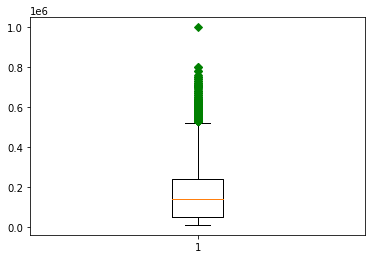

In [57]:
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

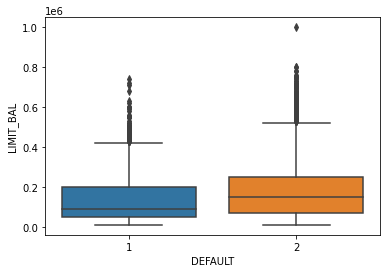

In [58]:
sns.boxplot(x=credit.DEFAULT, 
            y=credit.LIMIT_BAL,
         #  hue =credit.DEFAULT, 
           data=credit
           )
print()

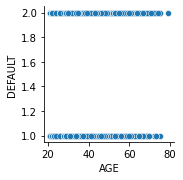

In [59]:
sns.pairplot(data=credit,
            x_vars=['AGE'],
            y_vars=['DEFAULT'])
plt.show()

## Correlation and Covariant Matrices

In [65]:
# Correlation matrix for all features
# None of the features have a strong correlation to DEFAULT, highest is PAY_0
# None of the features have a strong correlation to LIMIT_BAL, highest is PAY_2

corr_mat = credit.corr()
print(corr_mat)

                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.037659 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.231088 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.013627 -0.031389 -0.090874   
EDUCATION  0.037659  -0.231088  0.013627   1.000000 -0.149134  0.182434   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.149134  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.182434 -0.414170  1.000000   
PAY_0     -0.030575  -0.271214 -0.057643   0.112593  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.129703  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.122425  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.116531  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.104088  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.088986  0.034345 -0.048773   
BILL_AMT1  0.019389   0.2

In [61]:
# Covariance Matrix between all features
# None of the features have a strong covariance to LIMIT_BAL
# None of the features have a strong covariance to DEFAULT

covMat = credit.corr()
print(covMat)

                 ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
ID         1.000000   0.026179  0.018497   0.037659 -0.029079  0.018678   
LIMIT_BAL  0.026179   1.000000  0.024755  -0.231088 -0.108139  0.144713   
SEX        0.018497   0.024755  1.000000   0.013627 -0.031389 -0.090874   
EDUCATION  0.037659  -0.231088  0.013627   1.000000 -0.149134  0.182434   
MARRIAGE  -0.029079  -0.108139 -0.031389  -0.149134  1.000000 -0.414170   
AGE        0.018678   0.144713 -0.090874   0.182434 -0.414170  1.000000   
PAY_0     -0.030575  -0.271214 -0.057643   0.112593  0.019917 -0.039447   
PAY_2     -0.011215  -0.296382 -0.070771   0.129703  0.024199 -0.050148   
PAY_3     -0.018494  -0.286123 -0.066096   0.122425  0.032688 -0.053048   
PAY_4     -0.002735  -0.267460 -0.060173   0.116531  0.033122 -0.049722   
PAY_5     -0.022199  -0.249411 -0.055064   0.104088  0.035629 -0.053826   
PAY_6     -0.020270  -0.235195 -0.044008   0.088986  0.034345 -0.048773   
BILL_AMT1  0.019389   0.2

## Pandas Profiling Report

In [6]:
# run pandas profiling and produce the profile report and save to an html file
# on local drive
# Saved profile report to Credit1Profile.html
profile = credit.profile_report(title="Credit 1 Profile")
profile.to_file(output_file="Credit1Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Seaborn plot of all elements

In [60]:
# Seaborn plots of all elements
# Saved plots to Seaborn.jpeg in hopes of creating larger plots, since plots 
# are too small to read in the notebook.  No luck, still too small to be of use.  
# Removed the plots from the notebook to reduce the file size.  

# fig = sns.pairplot(credit)
# plt.figure(figsize=(100,100))
# sns.pairplot(credit)
# plt.show()
# fig.savefig("Seaborn.jpeg")